<em><sub>This page is available as an executable or viewable <strong>Jupyter Notebook</strong>:</sub></em>
<br/><br/>
<a href="https://mybinder.org/v2/gh/JetBrains/lets-plot/v1.5.0demos1?filepath=docs%2Fexamples%2Fjupyter-notebooks%2Fsampling_stratified.ipynb"
   target="_parent"> 
   <img align="left" 
        src="https://mybinder.org/badge_logo.svg">
</a>
<a href="https://nbviewer.jupyter.org/github/JetBrains/lets-plot/blob/master/docs/examples/jupyter-notebooks/sampling_stratified.ipynb" 
   target="_parent"> 
   <img align="right" 
        src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png" 
        width="109" height="20">
</a>
<br/>
<br/>


## Stratified sampling

In large dataset a relatively small group of points might be overplotted by the dominant group. In this case **stratified** sampling can help.


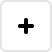
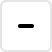
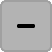
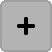
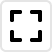
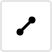
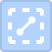

In [1]:
import numpy as np
import pandas as pd
from lets_plot import *

LetsPlot.setup_html()

In [2]:
N = 5000 
small_group = 3
large_group = N - small_group

np.random.seed(123)
data = dict(
    x = np.random.normal(0, 1, N),
    y = np.random.normal(0, 1, N),
    cond = ['A' for _ in range(small_group)] + ['B' for _ in range(large_group)]
)

In [3]:
# Data points in group 'A' (small group) are overplotted by the dominant group 'B'.
p = ggplot(data, aes('x','y',color='cond')) + \
    scale_color_manual(values=["red", "#1C9E77"], breaks=['A', 'B'])
p + geom_point(size=5, alpha=.2)

In [4]:
# The 'random' sampling loses the group 'A' altogether.
p + geom_point(size=5, sampling=sampling_random(50, seed=2))

In [5]:
# Stratified sampling ensures that group 'A' is represented.
p + geom_point(size=5, sampling=sampling_random_stratified(50, seed=2))